## Analytic description of Landau_mod routines with examples

In [1]:
import numpy as np
import os
import sys
import inspect
import matplotlib.pyplot as plt


plt.rc('font', family='serif')

current_dir =  os.path.abspath(os.path.dirname('__file__'))

fpath = os.path.abspath(current_dir + "/..")
sys.path.append(fpath)

import environment_mod as env
import waveproperties_mod as wave
import Landau_mod as landau

 <a class="anchor" id="top-bullet"></a>
### Table of Contents

* [Landau_mod.bell_distribution](#bell_distribution-bullet)
* [Landau_mod.bortnik_distribution](#bortnik_distribution-bullet)
* [Landau_mod.landau_damping](#landau_damping-bullet)
* [Landau_mod.landau_damping](#landau_damping-bullet)
* [Landau_mod.landau_damping](#landau_damping-bullet)
* [Landau_mod.landau_damping](#landau_damping-bullet)
* [Landau_mod.landau_damping](#landau_damping-bullet)

### 1. Landau_mod.bell_distribution <a class="anchor" id="bell_distribution-bullet"></a>

**Routine to calculate the suprathermal electron distribution according to Bell et al., 2002**

***
**<font color='blue'>Description</font>**

Bell et al.[2002] derived the distribution of 0.1 to 1.5 keV electrons, based on measurements of the HYDRA instrument onboard the POLAR satellite. They proposed the distribution of the form:

$$f^{Bell}(u)=\frac{a}{u^4}-\frac{b}{u^5}+\frac{c}{u^6}$$

with $a=4.9\cdot10^{5}/(cm^{-2}\cdot s)$, $b=8.3\cdot10^{14}/(cm \cdot s^{2})$ and $b=5.4 \cdot 10^{23}/(s^3)$

Bortnik et al. [2006] used a scale factor to adress understimations of the Bell distribution. So in their calculations of Landau damping used a scale factor of 10, thus:

$$f^{Bortnik}(u)=10f^{Bell}(u)$$
***

**<font color='red'>Inputs</font>**

**vperp**: perpendicular velocity

**vpar**: parallel velocity


***

**<font color='green'>Outputs</font>**

**f**: electron distribution

***

**Reference**

Bell, T. F., Inan, U. S., Bortnik, J., & Scudder, J. D. (2002). The Landau damping of magnetospherically reflected whistlers within the plasmasphere. Geophysical research letters, 29(15), 23-1.

Bortnik, J., Inan, U. S., & Bell, T. F. (2006). Landau damping and resultant unidirectional propagation of chorus waves. Geophysical research letters, 33(3).

***
[Return to top](#top-bullet) 

### 2. Landau_mod.bortnik_distribution <a class="anchor" id="bortnik_distribution-bullet"></a>

**Routine to calculate the suprathermal electron distribution according to Bortink et al.[2007]**

***

**<font color='blue'>Description</font>**

Bortnik et al.[2002] derived the distribution of 0.213 to 16.5 keV electrons, based on measurements of the CRRES satellite. They proposed the distribution of the form:

$$f^{Bortnik}(u)=\frac{A_N}{v^n}$$

with 

$$A_N=\frac{2\times10^{\alpha_0}}{\Big(\frac{1}{2}m'\Big)^{\alpha_1-1}}$$

$$n=2\alpha_1+2$$

$$m'=\kappa_0m_e$$

$$\kappa_0=6.25*(10^{11})$$

$$\alpha_11=0.755$$

$$\alpha_0=\log(2.14 \times 10^7) $$


***

**<font color='red'>Inputs</font>**

**vperp**: perpendicular velocity

**vpar**: parallel velocity


***

**<font color='green'>Outputs</font>**

**f**: electron distribution

***

**Reference**

Bortnik, J., R. M. Thorne, and N. P. Meredith (2007), Modeling the propagation characteristics of chorus using CRRESsuprathermal electron fluxes,J. Geophys. Res.,112, A08204, doi:10.1029/2006JA012237.

***
[Return to top](#top-bullet) 

### 3. Landau_mod.golden_distribution <a class="anchor" id="golden_distribution-bullet"></a>

**Routine to calculate the suprathermal electron distribution according to Golden et al.[2010]**

***

**<font color='blue'>Description</font>**

A hybrid model that smooths the Bell and Bortnik distributions at the plasmashere boundary:

$$f_{hybrid}=exp\Bigg(\frac{\log(f_{Bell})w^{Bell}+\log(f_{Bortnik})w^{Bortnik}}{w^{Bortnik}+w^{Bell}} \Bigg)$$

where the waheights:

$$w^{Bell}=\frac{exp(-\alpha(L_{meas}-L_{PP}))}{1+exp(-\alpha(L_{meas}-L_{PP}))}$$
$$w^{Bortnik}=\frac{exp(\alpha(L_{meas}-L_{PP}))}{1+exp(\alpha(L_{meas}-L_{PP}))}$$

where $L_{meas}$ is the L shell of interest and $L_{pp}$ is the plasmapause location.
***

**<font color='red'>Inputs</font>**

**vperp**: perpendicular velocity

**vpar**: parallel velocity

**kpmax**: Kpmax for calculating plasmapause location according to Carpender and Anderson [1992] 

**Lmeas**: L shell

***

**<font color='green'>Outputs</font>**

**f**: electron distribution

***

**Reference**

Golden, D. I., M. Spasojevic, F. R. Foust, N. G. Lehtinen, N. P. Meredith, and U. S. Inan (2010), Role of the
plasmapause in dictating the ground accessibility of ELF/VLF chorus, J. Geophys. Res., 115, A11211,
doi:10.1029/2010JA015955.

***
[Return to top](#top-bullet) 

### 4. Landau_mod.bi_maxwellian_distribution <a class="anchor" id="bi_maxwellian_distribution-bullet"></a>

**Calculate the anistorpic bi-maxwellian distribution**

***

**<font color='blue'>Description</font>**

According to Maxworth et al. [2020]

$$f_{bimax}=\frac{n_h}{(3/2)2\pi U_\parallel U_\perp^2}exp\Bigg(\frac{-u_\parallel^2}{2 U_\parallel^2} \Bigg)\frac{1}{1-\beta}\Bigg[ exp\Bigg(\frac{-u_\perp^2}{2 U_\perp^2} \Bigg) - exp\Bigg(\frac{-u_\perp^2}{2\beta U_\perp^2} \Bigg)\Bigg]$$

where

$n_h$: hot energetic electron density

$U_\parallel$: parallel component of thermal momentum per unit mass

$U_\perp$: perpendicular component of thermal momentum per unit mass

$u_\parallel$: $\gamma v_\parallel$

$u_\perp$: $\gamma v_\perp$

$\beta$: defines the loss cone, the larger the beta the larger the loss cone

Following Maxworth et al. [2020], we define: $n_h=2\times10^{-3} m^{-3}$, $U_\parallel=0.05c$,$U_\perp=0.03c$,
$\beta=0.01$
***

**<font color='red'>Inputs</font>**

**vperp**: perpendicular velocity

**vpar**: parallel velocity


***

**<font color='green'>Outputs</font>**

**f**: electron distribution

***

**Reference**

Maxworth, A. S., Gołkowski, M., Malaspina, D. M., & Jaynes, A. N. (2020). Raytracing study of source regions of whistler mode wave power distribution relative to the plasmapause. Journal of Geophysical Research: Space Physics, 125, e2019JA027154. https://doi.org/10.1029/2019JA027154

***
[Return to top](#top-bullet) 

### Example

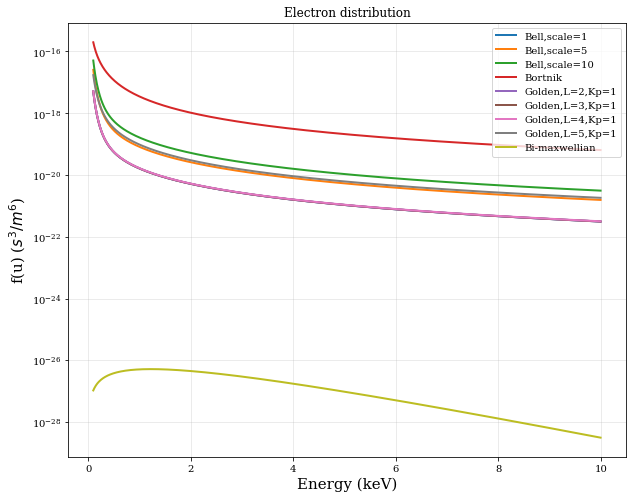

In [2]:
Ekev_range=np.arange(0.1,10,0.01)
alpha=np.deg2rad(1)
f_bell=[]
f_bortnik=[]
f_goldenL2=[]
f_goldenL3=[]
f_goldenL4=[]
f_goldenL5=[]
f_maxw=[]
Kpmax=1
L2=2
L3=3
L4=4
L5=5
for i in range(0,len(Ekev_range)):
    upar0,uper0,ppar0,pper0,gamma0=env.momentums(Ekev_range[i],alpha,env.const.me)
    
    f1_tmp=landau.bell_distribution(uper0,upar0)
    f_b=landau.bortnik_distribution(uper0,upar0)
    f_gL2=landau.golden_distribution(uper0,upar0,Kpmax,L2)
    f_gL3=landau.golden_distribution(uper0,upar0,Kpmax,L3)
    f_gL4=landau.golden_distribution(uper0,upar0,Kpmax,L4)
    f_gL5=landau.golden_distribution(uper0,upar0,Kpmax,L5)
    fmaxwtmp=landau.bi_maxwellian_distribution(uper0,upar0)
    f_goldenL2.append(f_gL2)
    f_goldenL3.append(f_gL3)
    f_goldenL4.append(f_gL4)
    f_goldenL5.append(f_gL5)
    f_bortnik.append(f_b)
    f_bell.append(f1_tmp)
    f_maxw.append(fmaxwtmp)

    
f_bell=np.asarray(f_bell)
f_bortnik=np.asarray(f_bortnik)

###plot###############################
fig, ax = plt.subplots(figsize=(10,8))
s=2
fonts=15

ax.plot(Ekev_range,f_bell,label='Bell,scale=1',linewidth=s)
ax.plot(Ekev_range,5*f_bell,label='Bell,scale=5',linewidth=s)
ax.plot(Ekev_range,10*f_bell,label='Bell,scale=10',linewidth=s)
ax.plot(Ekev_range,f_bortnik,label='Bortnik',linewidth=s)
ax.plot(Ekev_range,f_goldenL2,label='Golden,L=2,Kp=1',linewidth=s)
ax.plot(Ekev_range,f_goldenL3,label='Golden,L=3,Kp=1',linewidth=s)
ax.plot(Ekev_range,f_goldenL4,label='Golden,L=4,Kp=1',linewidth=s)
ax.plot(Ekev_range,f_goldenL5,label='Golden,L=5,Kp=1',linewidth=s)
ax.plot(Ekev_range,f_maxw,label='Bi-maxwellian',linewidth=s)
ax.set_yscale('log')
ax.grid(alpha=.3)
# ax.set_xlim(-90,90)
ax.set_title('Electron distribution')
ax.set_ylabel('f(u) ($s^3/m^6$)',fontsize=fonts)
ax.set_xlabel(r'Energy (keV)',fontsize=fonts)
ax.legend()
# ax.set_ylim(0,5)

plt.show()


[Return to top](#top-bullet) 

### 5. Landau_mod.landau_damping <a class="anchor" id="landau_damping-bullet"></a>

**Calculates the Landau damping of a ray**
***
We calculate the spatial growth rate $\chi$ based on the formulation of Brinca[1972], who expanded the work of Kennel[1966].

$$\chi = - \frac{ck_i}{\omega} 
       = \frac{A_N}{4\mu(2A\mu^2-B)} \Bigg[ \frac{\mu^2 \sin^2 \theta -P}{2(S-\mu^2) } \Gamma_1 \Big[  (R-\mu^2) J_{m_1} + (L- \mu^2 ) J_{m+1} \Big]^2 G_1 - 2 \Big[ (S-\mu^2 \cos^2 \theta)(S-\mu^2)-D^2\Big] \Lambda_1 J_m G_2 - 2 \mu^2 \sin \theta \cos \theta \Gamma_1 \Big[ (R-\mu^2) J_{m-1} + (L-\mu^2 ) J_{m+1} \Big]^2 G2 \Bigg]$$

where the symbols D, L, P , R, and S are the Stix parameters, and:

$$A=S\sin^2\theta+P\cos^2\theta$$
$$B=RLsin^2\theta+PS(1+\cos^2\theta)$$
$$C=PRL$$

$\mu$ is the real part of the refractive index, $A_N$ is the normalization constant ,the argument of the Bessel functions $J_i$ is $\beta$ and the
operators $\Gamma_1$ and $\Lambda_1$ are defined as:

$$\Gamma_1= \frac{2 \pi^2 \omega_{pe}^2 }{\omega k_z} \sum_{m=-\infty}^{\infty} \int_{0}^{\infty}
 u_{\perp}^2 d u_{\perp} \int_{-\infty}^{\infty} du_z \delta (u_z-u_z^{res})   $$

$$\Lambda_1= \frac{2 \pi^2 \omega_{pe}^2 }{\omega k_z} \sum_{m=-\infty}^{\infty} \int_{0}^{\infty}
 u_{\perp} d u_{\perp} \int_{-\infty}^{\infty} u_z du_z \delta (u_z-u_z^{res})   $$
 
$$G_1=\Big( 1- \frac{k_zu_z}{\omega} \Big) \frac{\partial f}{\partial u_{\perp}} + \frac{k_zu_{\perp}}{\omega} \frac{\partial f}{\partial u_{z}} $$

$$G2=J_m \Big[ \Big( 1+ \frac{m \omega_H}{k_z}\Big) \frac{\partial f}{\partial u_{z}} - m \frac{\omega_H u_z}{\omega u_{\perp}} \frac{\partial f}{\partial u_{\perp}} \Big]$$

and f is the electron distribution function.


***

**<font color='red'>Inputs</font>**

**ray_file**: Stanford's 3D Ray tracer output

**distr**: thermal electron d


***

**<font color='green'>Outputs</font>**

**ray_file_damp**:csv ray file with appended damping values

***

**Reference**

Brinca, A. L. (1972), On the Stability of Obliquely Propagating Whistlers, Journal
of Geophysical Research, 77 (19), 3495–3507.

Kennel, C. (1966), Low-Frequency Whistler Mode, Physics of Fluids, 9 (11), 2190,
doi:10.1063/1.1761588.

***

In [3]:

ray_file='example_rays/freq2464_psi-89_L2_lamda_-5_v2.ray'
    
landau.landau_damping(ray_file,'Bell')

step of total steps:


KeyboardInterrupt: 

[Return to top](#top-bullet) 